In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_data = pd.read_csv(url, delimiter=r"\s+", header=None)

housing_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Split the data into features and target
X = housing_data.drop('MEDV', axis=1)
y = housing_data['MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


Mean squared error:  22.7884588075813
R² score:  0.694168405782774


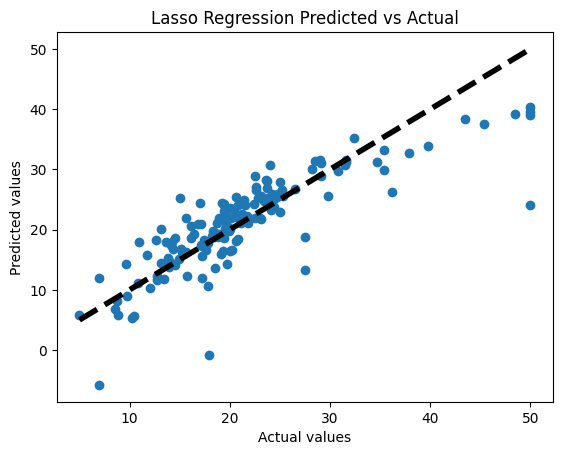

In [21]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error: ", mse)
print("R² score: ", r2)

# Plot the predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Lasso Regression Predicted vs Actual')
plt.show()


Mean squared error:  2817.0876377470295
R² score:  0.4781535692283557


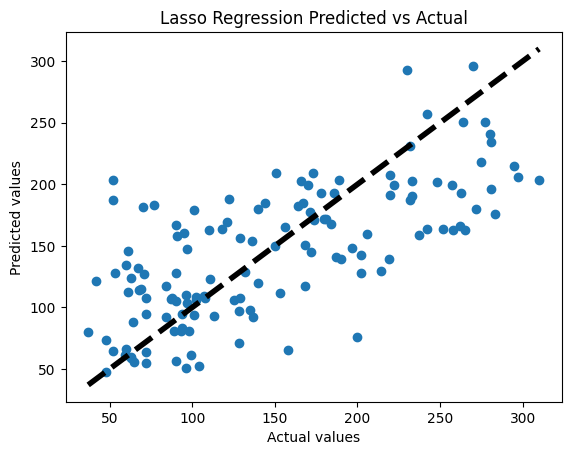

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = load_diabetes()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error: ", mse)
print("R² score: ", r2)

# Plot the predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Lasso Regression Predicted vs Actual')
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_8644\1289525500.py:34: RuntimeWarning: overflow encountered in matmul
  grad = (X.T @ (X @ self.coef_ - y)) / X.shape[0] + self.alpha * np.sign(self.coef_)
C:\Users\acer\AppData\Local\Temp\ipykernel_8644\1289525500.py:36: RuntimeWarning: invalid value encountered in subtract
  self.coef_ -= self.lr * grad


Model coefficients: [nan nan nan nan nan nan nan nan nan]
Mean squared error: nan


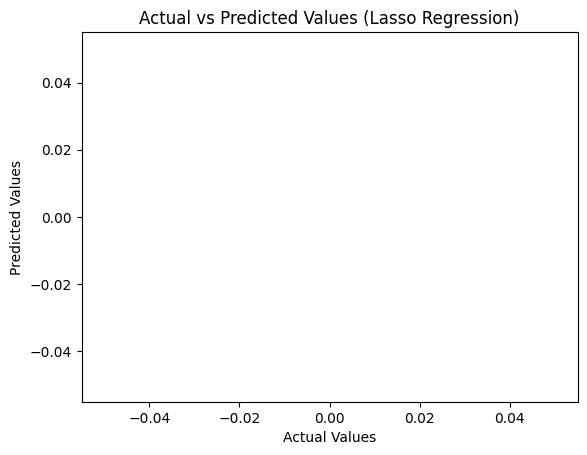

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# load the california housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LassoRegression:
    
    def __init__(self, alpha=1.0, tol=0.0001, max_iter=1000, lr=0.01, lr_decay=0.99):
        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.lr = lr
        self.lr_decay = lr_decay
    
    def fit(self, X, y):
        # add bias term to X
        X = np.insert(X, 0, 1, axis=1)
        
        # initialize coefficients
        self.coef_ = np.zeros(X.shape[1])
        
        # gradient descent
        for i in range(self.max_iter):
            old_coef = np.copy(self.coef_)
            grad = (X.T @ (X @ self.coef_ - y)) / X.shape[0] + self.alpha * np.sign(self.coef_)
            self.lr *= self.lr_decay
            self.coef_ -= self.lr * grad
            if np.abs(self.coef_ - old_coef).all() < self.tol:
                break
    
    def predict(self, X):
        # add bias term to X
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.coef_



# train the Lasso regression model
lasso = LassoRegression(alpha=0.01, tol=0.00001, max_iter=10000)
lasso.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lasso.predict(X_test)

# calculate mean squared error
mse = np.mean((y_test - y_pred) ** 2)
print("Model coefficients:", lasso.coef_)
print("Mean squared error:", mse)

# plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.show()
